#MULTI-CLASS CLASSIFICATION AND REGRESSION

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA


from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/data_mining/CO2_Emission.xlsx')

In [ ]:
df

MODEL YEAR   MAKE MODEL(# = high output engine)  VEHICLE CLASS  \
0             NaN    NaN                           NaN            NaN   
1          1995.0  ACURA                       INTEGRA     SUBCOMPACT   
2          1995.0  ACURA                       INTEGRA     SUBCOMPACT   
3          1995.0  ACURA                  INTEGRA GS-R     SUBCOMPACT   
4          1995.0  ACURA                        LEGEND        COMPACT   
...           ...    ...                           ...            ...   
26071      2022.0  Volvo                   XC40 T5 AWD     SUV: Small   
26072      2022.0  Volvo                   XC60 B5 AWD     SUV: Small   
26073      2022.0  Volvo                   XC60 B6 AWD     SUV: Small   
26074      2022.0  Volvo                   XC90 T5 AWD  SUV: Standard   
26075      2022.0  Volvo                   XC90 T6 AWD  SUV: Standard   

       ENGINE SIZE (L)  CYLINDERS TRANSMISSION FUEL TYPE  \
0                  NaN        NaN          NaN       NaN   
1                  1.8        4.0           A4         X   
2                  1.8        4.0           M5         X   
3                  1.8        4.0           M5         Z   
4                  3.2        6.0           A4         Z   
...                ...        ...          ...       ...   
26071              2.0        4.0          AS8         Z   
26072              2.0        4.0          AS8         Z   
26073              2.0        4.0          AS8         Z   
26074              2.0        4.0          AS8         Z   
26075              2.0        4.0          AS8         Z   

       FUEL CONSUMPTION CITY (L/100)  FUEL CONSUMPTION HWY (L/100)  \
0                                NaN                           NaN   
1                               11.6                           8.3   
2                               11.0                           8.3   
3                               10.8                           8.3   
4                               14.2                          10.5   
...                              ...                           ...   
26071                           10.7                           7.7   
26072                           10.5                           8.1   
26073                           11.0                           8.7   
26074                           11.5                           8.4   
26075                           12.4                           8.9   

       COMB (L/100 km)  COMB (mpg)  CO2 EMISSIONS (g/km)  CO2 Rating  \
0                  NaN         NaN                   NaN         NaN   
1                 10.1        28.0                 232.0         NaN   
2                  9.8        29.0                 225.0         NaN   
3                  9.7        29.0                 223.0         NaN   
4                 12.5        23.0                 288.0         NaN   
...                ...         ...                   ...         ...   
26071              9.4        30.0                 219.0         5.0   
26072              9.4        30.0                 219.0         5.0   
26073              9.9        29.0                 232.0         5.0   
26074             10.1        28.0                 236.0         5.0   
26075             10.8        26.0                 252.0         5.0   

       Smog Rating  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
26071          5.0  
26072          5.0  
26073          7.0  
26074          5.0  
26075          7.0  

[26076 rows x 15 columns]

In [ ]:
df = df.drop(0)#First row contains NAN value therefore deleting it

In [ ]:
df

MODEL YEAR   MAKE MODEL(# = high output engine)  VEHICLE CLASS  \
1          1995.0  ACURA                       INTEGRA     SUBCOMPACT   
2          1995.0  ACURA                       INTEGRA     SUBCOMPACT   
3          1995.0  ACURA                  INTEGRA GS-R     SUBCOMPACT   
4          1995.0  ACURA                        LEGEND        COMPACT   
5          1995.0  ACURA                  LEGEND COUPE        COMPACT   
...           ...    ...                           ...            ...   
26071      2022.0  Volvo                   XC40 T5 AWD     SUV: Small   
26072      2022.0  Volvo                   XC60 B5 AWD     SUV: Small   
26073      2022.0  Volvo                   XC60 B6 AWD     SUV: Small   
26074      2022.0  Volvo                   XC90 T5 AWD  SUV: Standard   
26075      2022.0  Volvo                   XC90 T6 AWD  SUV: Standard   

       ENGINE SIZE (L)  CYLINDERS TRANSMISSION FUEL TYPE  \
1                  1.8        4.0           A4         X   
2                  1.8        4.0           M5         X   
3                  1.8        4.0           M5         Z   
4                  3.2        6.0           A4         Z   
5                  3.2        6.0           A4         Z   
...                ...        ...          ...       ...   
26071              2.0        4.0          AS8         Z   
26072              2.0        4.0          AS8         Z   
26073              2.0        4.0          AS8         Z   
26074              2.0        4.0          AS8         Z   
26075              2.0        4.0          AS8         Z   

       FUEL CONSUMPTION CITY (L/100)  FUEL CONSUMPTION HWY (L/100)  \
1                               11.6                           8.3   
2                               11.0                           8.3   
3                               10.8                           8.3   
4                               14.2                          10.5   
5                               14.6                          11.0   
...                              ...                           ...   
26071                           10.7                           7.7   
26072                           10.5                           8.1   
26073                           11.0                           8.7   
26074                           11.5                           8.4   
26075                           12.4                           8.9   

       COMB (L/100 km)  COMB (mpg)  CO2 EMISSIONS (g/km)  CO2 Rating  \
1                 10.1        28.0                 232.0         NaN   
2                  9.8        29.0                 225.0         NaN   
3                  9.7        29.0                 223.0         NaN   
4                 12.5        23.0                 288.0         NaN   
5                 13.0        22.0                 299.0         NaN   
...                ...         ...                   ...         ...   
26071              9.4        30.0                 219.0         5.0   
26072              9.4        30.0                 219.0         5.0   
26073              9.9        29.0                 232.0         5.0   
26074             10.1        28.0                 236.0         5.0   
26075             10.8        26.0                 252.0         5.0   

       Smog Rating  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
5              NaN  
...            ...  
26071          5.0  
26072          5.0  
26073          7.0  
26074          5.0  
26075          7.0  

[26075 rows x 15 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26075 entries, 1 to 26075
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MODEL YEAR                     26075 non-null  float64
 1   MAKE                           26075 non-null  object 
 2   MODEL(# = high output engine)  26075 non-null  object 
 3   VEHICLE CLASS                  26075 non-null  object 
 4   ENGINE SIZE (L)                26075 non-null  float64
 5   CYLINDERS                      26075 non-null  float64
 6   TRANSMISSION                   26075 non-null  object 
 7   FUEL TYPE                      26075 non-null  object 
 8   FUEL CONSUMPTION CITY (L/100)  26075 non-null  float64
 9   FUEL CONSUMPTION HWY (L/100)   26075 non-null  float64
 10  COMB (L/100 km)                26075 non-null  float64
 11  COMB (mpg)                     26075 non-null  float64
 12  CO2 EMISSIONS (g/km)           26075 non-null 

In [ ]:
df.isnull().sum()
# There are missing values present in attributes, 'CO2 Rating' and 'Smog Rating.'
# CO2 rating has 18904 missing values.
# Smog rating has 20014 missing values.

MODEL YEAR                           0
MAKE                                 0
MODEL(# = high output engine)        0
VEHICLE CLASS                        0
ENGINE SIZE (L)                      0
CYLINDERS                            0
TRANSMISSION                         0
FUEL TYPE                            0
FUEL CONSUMPTION CITY (L/100)        0
FUEL CONSUMPTION HWY (L/100)         0
COMB (L/100 km)                      0
COMB (mpg)                           0
CO2 EMISSIONS (g/km)                 0
CO2 Rating                       18904
Smog Rating                      20014
dtype: int64

In [ ]:
df.describe() #Getting summary of the data

MODEL YEAR  ENGINE SIZE (L)     CYLINDERS  \
count  26075.000000     26075.000000  26075.000000   
mean    2009.576031         3.355448      5.844257   
std        7.725814         1.342021      1.796767   
min     1995.000000         0.800000      2.000000   
25%     2004.000000         2.300000      4.000000   
50%     2010.000000         3.000000      6.000000   
75%     2016.000000         4.200000      8.000000   
max     2022.000000         8.400000     16.000000   

       FUEL CONSUMPTION CITY (L/100)  FUEL CONSUMPTION HWY (L/100)  \
count                   26075.000000                  26075.000000   
mean                       13.036272                      9.162991   
std                         3.560212                      2.398400   
min                         3.500000                      3.200000   
25%                        10.600000                      7.500000   
50%                        12.600000                      8.700000   
75%                        15.100000                     10.500000   
max                        30.600000                     20.900000   

       COMB (L/100 km)    COMB (mpg)  CO2 EMISSIONS (g/km)   CO2 Rating  \
count     26075.000000  26075.000000          26075.000000  7171.000000   
mean         11.294082     26.784314            256.679003     4.659880   
std           2.997495      7.306594             63.062087     1.638001   
min           3.600000     11.000000             83.000000     1.000000   
25%           9.200000     22.000000            212.500000     4.000000   
50%          10.800000     26.000000            248.000000     5.000000   
75%          13.000000     31.000000            297.000000     6.000000   
max          26.100000     78.000000            608.000000    10.000000   

       Smog Rating  
count  6061.000000  
mean      4.674311  
std       1.791209  
min       1.000000  
25%       3.000000  
50%       5.000000  
75%       6.000000  
max       8.000000

<Axes: xlabel='Smog Rating'>

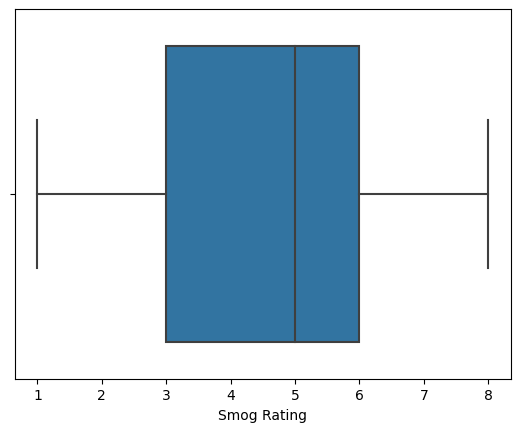

In [ ]:
sns.boxplot(data = df, x = 'Smog Rating') #There are no outliers so we can use mean as imputing method

In [ ]:
#Imputing NaN values with mean of the column
df['Smog Rating'].fillna(df['Smog Rating'].mean(), inplace = True)

In [ ]:
df['CO2 Rating'].fillna(df['CO2 Rating'].mean(), inplace = True)

In [ ]:
df.head()

MODEL YEAR   MAKE MODEL(# = high output engine) VEHICLE CLASS  \
1      1995.0  ACURA                       INTEGRA    SUBCOMPACT   
2      1995.0  ACURA                       INTEGRA    SUBCOMPACT   
3      1995.0  ACURA                  INTEGRA GS-R    SUBCOMPACT   
4      1995.0  ACURA                        LEGEND       COMPACT   
5      1995.0  ACURA                  LEGEND COUPE       COMPACT   

   ENGINE SIZE (L)  CYLINDERS TRANSMISSION FUEL TYPE  \
1              1.8        4.0           A4         X   
2              1.8        4.0           M5         X   
3              1.8        4.0           M5         Z   
4              3.2        6.0           A4         Z   
5              3.2        6.0           A4         Z   

   FUEL CONSUMPTION CITY (L/100)  FUEL CONSUMPTION HWY (L/100)  \
1                           11.6                           8.3   
2                           11.0                           8.3   
3                           10.8                           8.3   
4                           14.2                          10.5   
5                           14.6                          11.0   

   COMB (L/100 km)  COMB (mpg)  CO2 EMISSIONS (g/km)  CO2 Rating  Smog Rating  
1             10.1        28.0                 232.0     4.65988     4.674311  
2              9.8        29.0                 225.0     4.65988     4.674311  
3              9.7        29.0                 223.0     4.65988     4.674311  
4             12.5        23.0                 288.0     4.65988     4.674311  
5             13.0        22.0                 299.0     4.65988     4.674311

In [ ]:
df.isnull().sum() #CO2 rating is what we aare goint to predict using classification task

MODEL YEAR                       0
MAKE                             0
MODEL(# = high output engine)    0
VEHICLE CLASS                    0
ENGINE SIZE (L)                  0
CYLINDERS                        0
TRANSMISSION                     0
FUEL TYPE                        0
FUEL CONSUMPTION CITY (L/100)    0
FUEL CONSUMPTION HWY (L/100)     0
COMB (L/100 km)                  0
COMB (mpg)                       0
CO2 EMISSIONS (g/km)             0
CO2 Rating                       0
Smog Rating                      0
dtype: int64

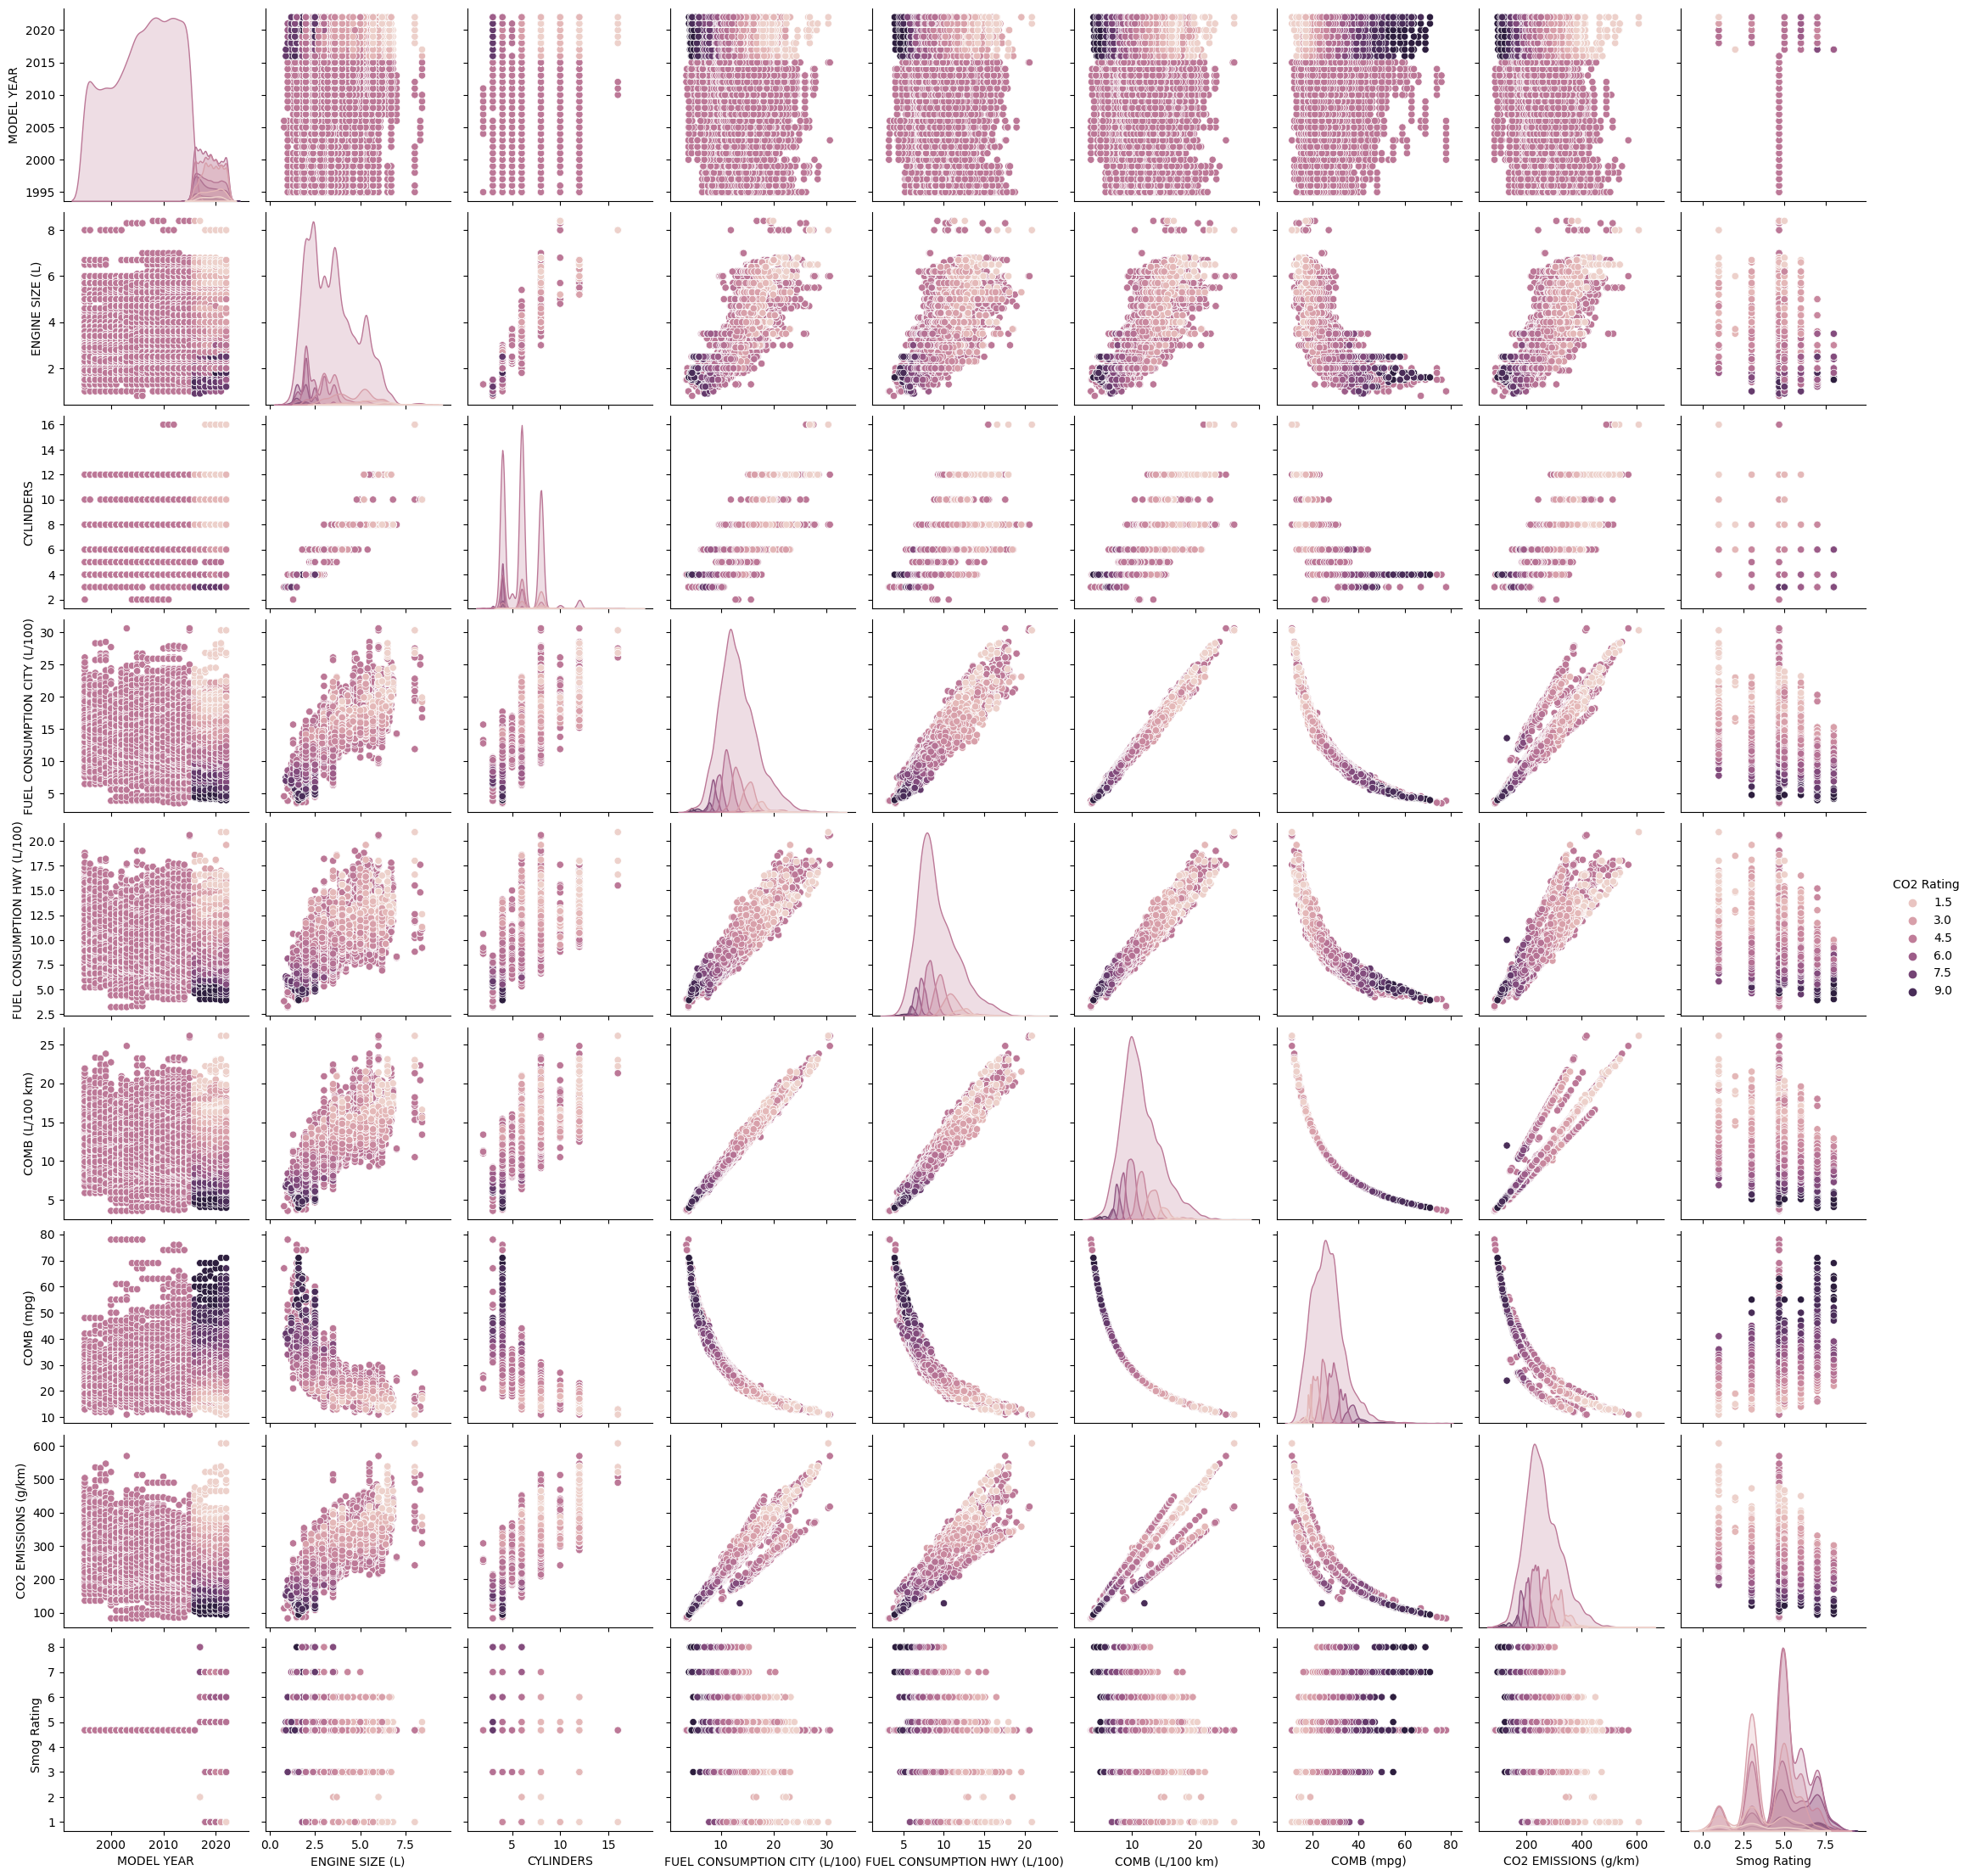

In [ ]:
sns.pairplot(data = df, hue = 'CO2 Rating') # Plotting a paitplot to explore the relationships between pairs of variables in a dataset

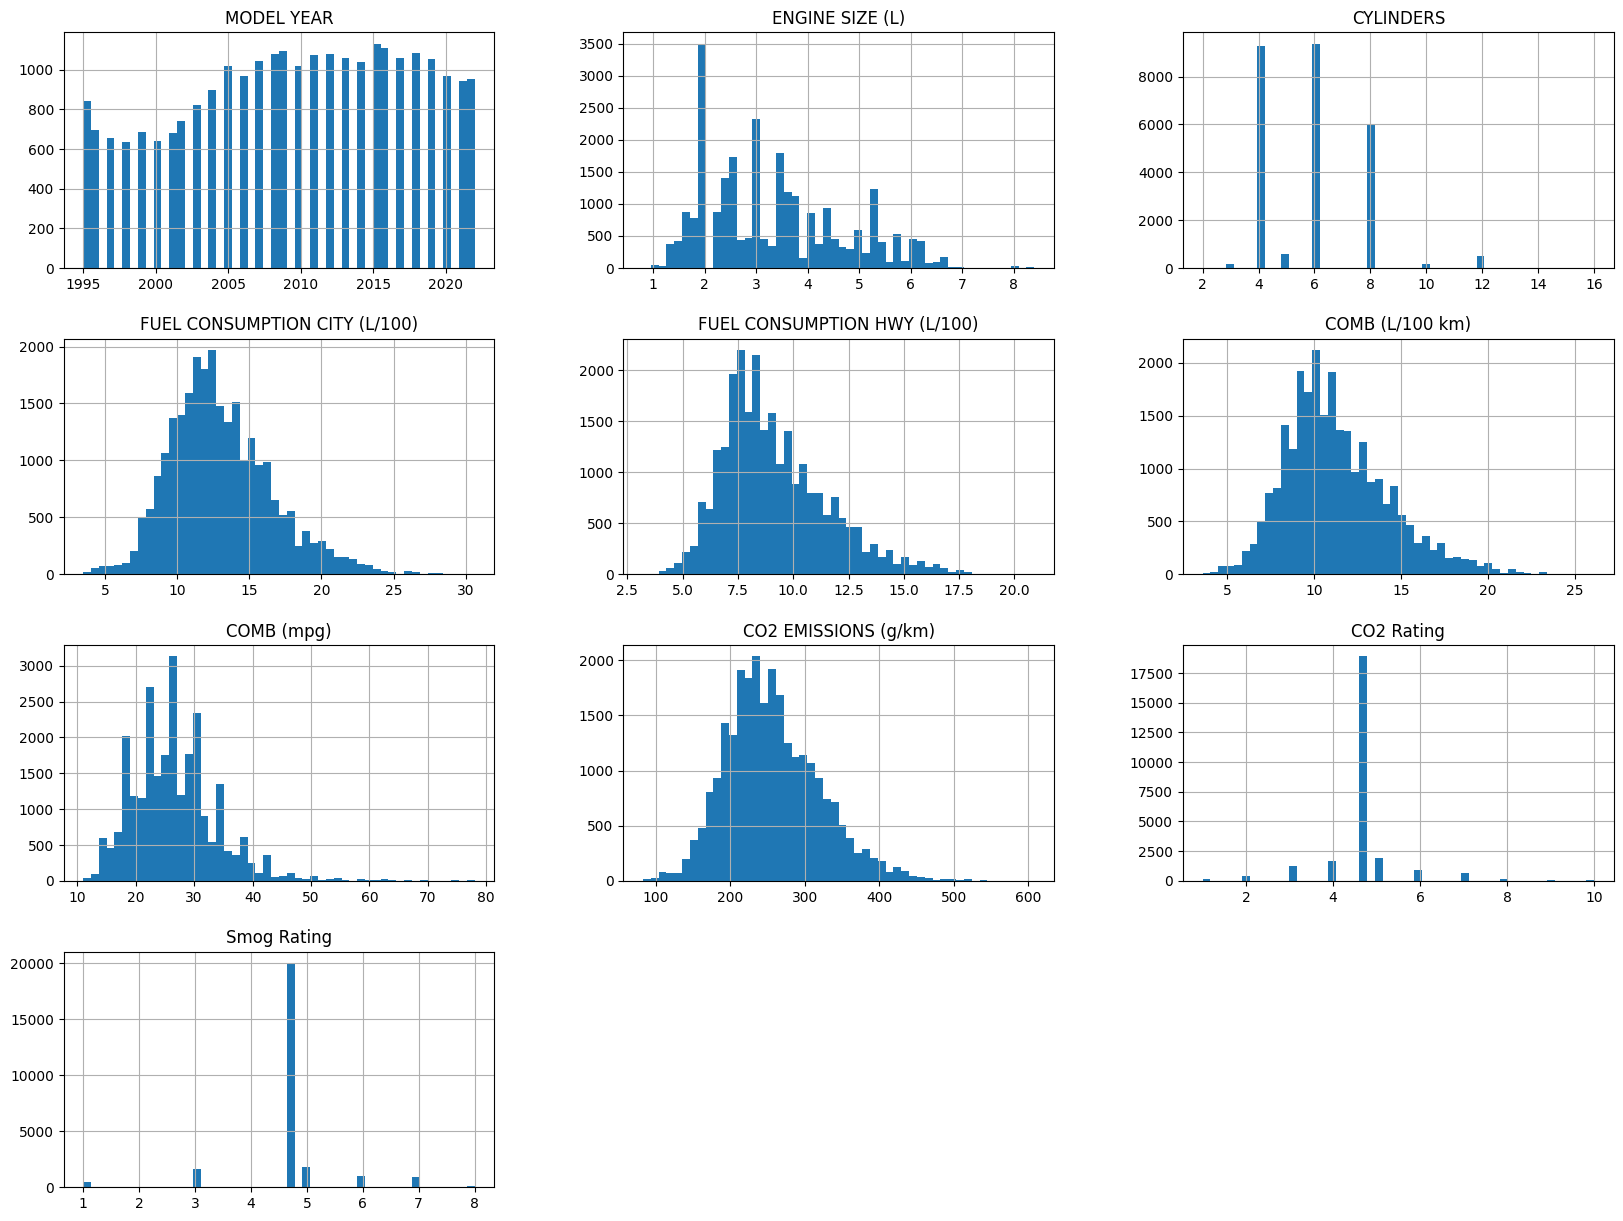

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

# The fuel consumed per 100 km is more on city roads than on highway roads.
# The majority of cars either have 4, 6 or 8 cylinders.
# Engine sizes a bit less than 2 litres are the most common.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'SUBCOMPACT'),
  Text(1, 0, 'COMPACT'),
  Text(2, 0, 'TWO-SEATER'),
  Text(3, 0, 'STATION WAGON - SMALL'),
  Text(4, 0, 'MINICOMPACT'),
  Text(5, 0, 'MID-SIZE'),
  Text(6, 0, 'FULL-SIZE'),
  Text(7, 0, 'STATION WAGON - MID-SIZE'),
  Text(8, 0, 'VAN - CARGO'),
  Text(9, 0, 'VAN - PASSENGER'),
  Text(10, 0, 'PICKUP TRUCK - STANDARD'),
  Text(11, 0, 'SUV'),
  Text(12, 0, 'MINIVAN'),
  Text(13, 0, 'PICKUP TRUCK - SMALL'),
  Text(14, 0, 'SUV - STANDARD'),
  Text(15, 0, 'SPECIAL PURPOSE VEHICLE'),
  Text(16, 0, 'SUV - SMALL'),
  Text(17, 0, 'Compact'),
  Text(18, 0, 'SUV: Small'),
  Text(19, 0, 'Two-seater'),
  Text(20, 0, 'Mid-size'),
  Text(21, 0, 'Minicompact'),
  Text(22, 0, 'Subcompact'),
  Text(23, 0, 'Station wagon: Small'),
  Text(24, 0, 'Full-size'),
  Text(25, 0, 'SUV: Standard'),
  Text(26, 0, 'Special purpose vehicle'),
  T

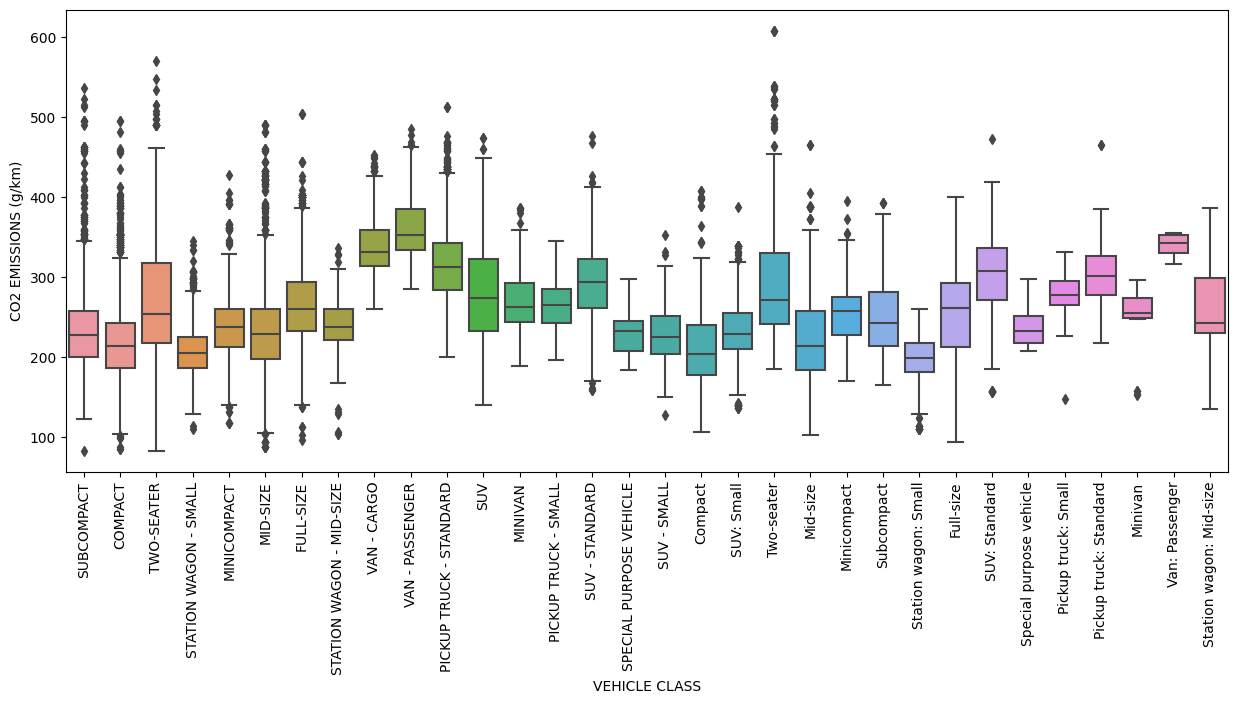

In [ ]:
plt.figure(figsize = (15,6))
sns.boxplot(data = df, y = 'CO2 EMISSIONS (g/km)', x = 'VEHICLE CLASS')
plt.xticks(rotation = 90)

By observing the box plot visualization between 'vehicle class' and 'CO2 emissions' it can be
observed that Van-passenger has the highest mean for CO2 emissions whereas station
wagonsmall has the lowest CO2 emissions

<Axes: xlabel='CYLINDERS', ylabel='CO2 EMISSIONS (g/km)'>

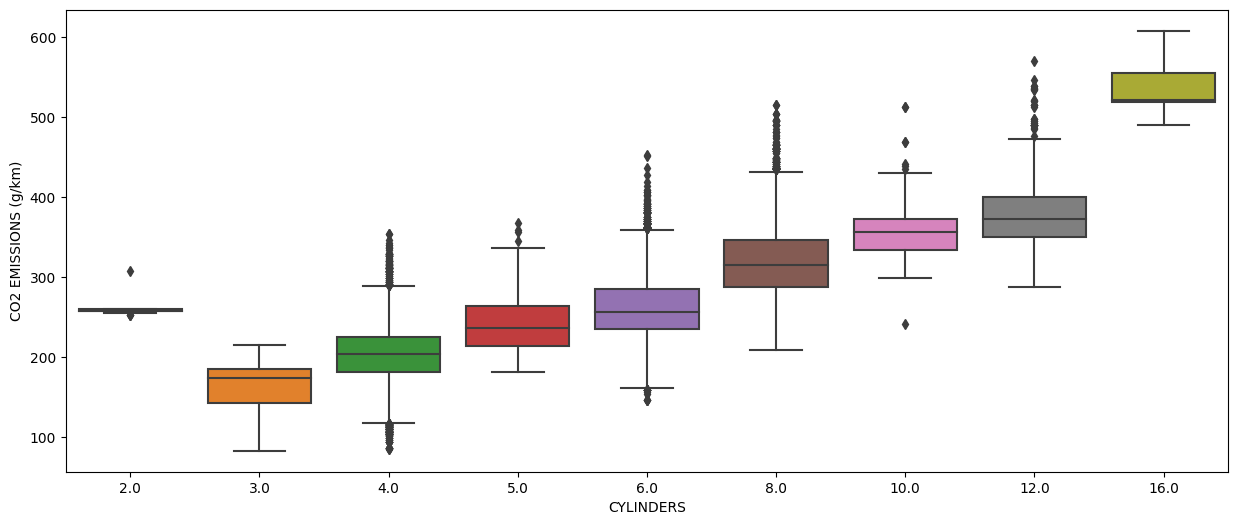

In [ ]:
plt.figure(figsize = (15,6))
sns.boxplot(data = df, y = 'CO2 EMISSIONS (g/km)', x = 'CYLINDERS')

By observing the box plot visualization between Cylinder engines and CO2 emissions it can be observed that Cylinder engine with rating 16 has the highest mean for CO2 emissions whereas cylinder engine with rating 3 has the lowest mean for CO2 emissions.

<Axes: xlabel='FUEL TYPE', ylabel='CO2 EMISSIONS (g/km)'>

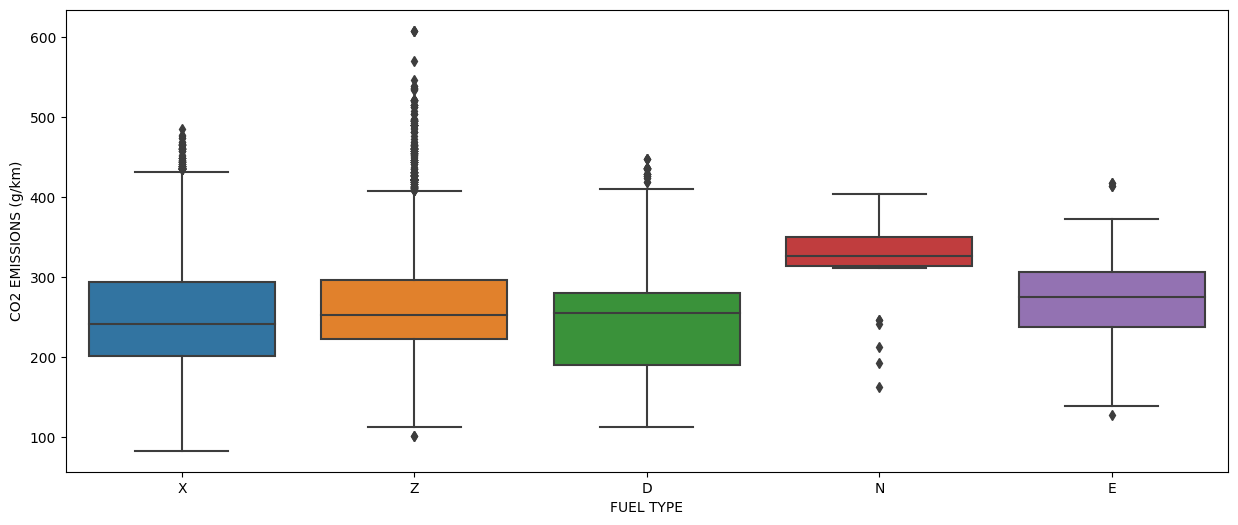

In [ ]:
plt.figure(figsize = (15,6))
sns.boxplot(data = df, y = 'CO2 EMISSIONS (g/km)', x = 'FUEL TYPE')

Again, with the below visualization of box plot between Fuel type and Co2 emissions it can be noted that Natural gas has the highest mean and thus contributes the most in the case of CO2 emissions.

In [ ]:
df.head()

MODEL YEAR   MAKE MODEL(# = high output engine) VEHICLE CLASS  \
1      1995.0  ACURA                       INTEGRA    SUBCOMPACT   
2      1995.0  ACURA                       INTEGRA    SUBCOMPACT   
3      1995.0  ACURA                  INTEGRA GS-R    SUBCOMPACT   
4      1995.0  ACURA                        LEGEND       COMPACT   
5      1995.0  ACURA                  LEGEND COUPE       COMPACT   

   ENGINE SIZE (L)  CYLINDERS TRANSMISSION FUEL TYPE  \
1              1.8        4.0           A4         X   
2              1.8        4.0           M5         X   
3              1.8        4.0           M5         Z   
4              3.2        6.0           A4         Z   
5              3.2        6.0           A4         Z   

   FUEL CONSUMPTION CITY (L/100)  FUEL CONSUMPTION HWY (L/100)  \
1                           11.6                           8.3   
2                           11.0                           8.3   
3                           10.8                           8.3   
4                           14.2                          10.5   
5                           14.6                          11.0   

   COMB (L/100 km)  COMB (mpg)  CO2 EMISSIONS (g/km)  CO2 Rating  Smog Rating  
1             10.1        28.0                 232.0     4.65988     4.674311  
2              9.8        29.0                 225.0     4.65988     4.674311  
3              9.7        29.0                 223.0     4.65988     4.674311  
4             12.5        23.0                 288.0     4.65988     4.674311  
5             13.0        22.0                 299.0     4.65988     4.674311

In [ ]:
# fig, axes = plt.subplots(3, 3, figsize=(20, 10))
# #sns.boxplot(df['FUEL TYPE'], ax = axes[0,0])
# sns.boxplot(df['COMB (mpg)'], ax = axes[0,1])
# sns.boxplot(df['CO2 EMISSIONS (g/km)'], ax = axes[0,2])
# sns.boxplot(df['ENGINE SIZE (L)'], ax = axes[1,0])
# sns.boxplot(df['CYLINDERS'], ax = axes[1,1])
# sns.boxplot(df['TRANSMISSION'], ax = axes[1,2])
# sns.boxplot(df['FUEL CONSUMPTION CITY (L/100)'], ax = axes[2,0])
# sns.boxplot(df['FUEL CONSUMPTION HWY (L/100)'], ax = axes[2,1])
# sns.boxplot(df['COMB (L/100 km)'], ax = axes[2,2])

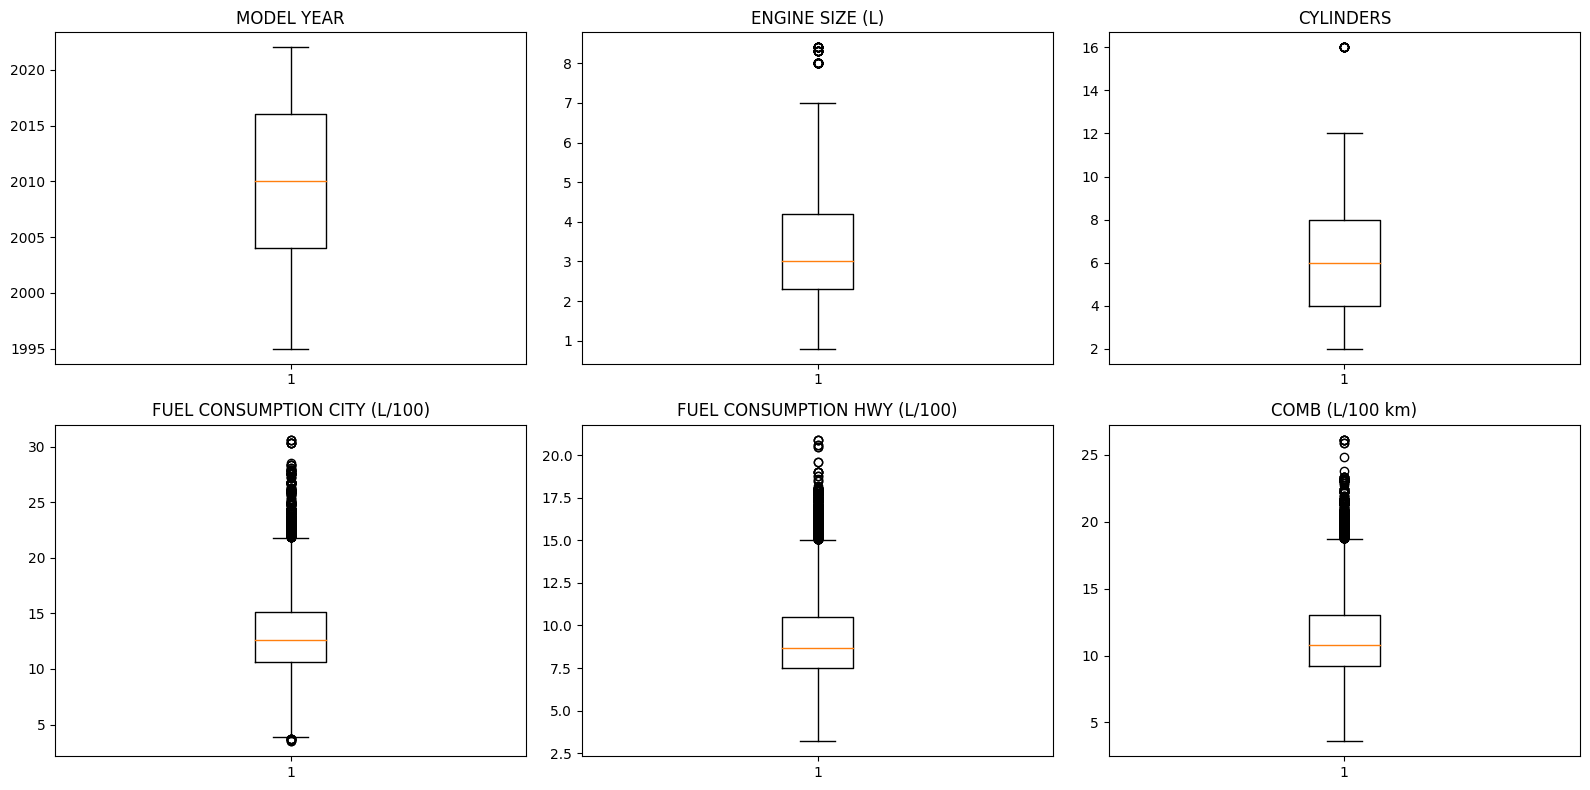

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
num_cols = df.select_dtypes(include='number').columns.tolist()

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

for row in range(2):
    for col in range(3):
        i = row * 3 + col
        try:
            axs[row, col].boxplot(df[num_cols[i]])
            axs[row, col].set_title(num_cols[i])
        except IndexError:
            pass

plt.tight_layout()
plt.show()


From the above plotted subplots we can observe that there are some outliers in the data but as these outliers represent natural variations in the population, therefore they should be left as it is in the dataset. Such outliers can be referred to as are called true outliers.

In [ ]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)
# cleandf = df[~((df< (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR)))]
# cleandf

In [ ]:
corr_matrix = df.corr()

<ipython-input-24-b69b4b6a6184>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [ ]:
corr_matrix["CO2 EMISSIONS (g/km)"].sort_values(ascending=False)
# We have done a correlation of all attributes with CO2 emission attribute.
# The 4 most corelated attributes are COMB(L/100), Fuel Consumption city, Fuel COnsumption HWY and COMB (mpg)
# We aren't including CO2 rating as we need to predict its values later on.

CO2 EMISSIONS (g/km)             1.000000
COMB (L/100 km)                  0.935492
FUEL CONSUMPTION CITY (L/100)    0.927856
FUEL CONSUMPTION HWY (L/100)     0.914104
ENGINE SIZE (L)                  0.798527
CYLINDERS                        0.766113
MODEL YEAR                      -0.205244
Smog Rating                     -0.206322
CO2 Rating                      -0.471736
COMB (mpg)                      -0.900366
Name: CO2 EMISSIONS (g/km), dtype: float64

<Axes: >

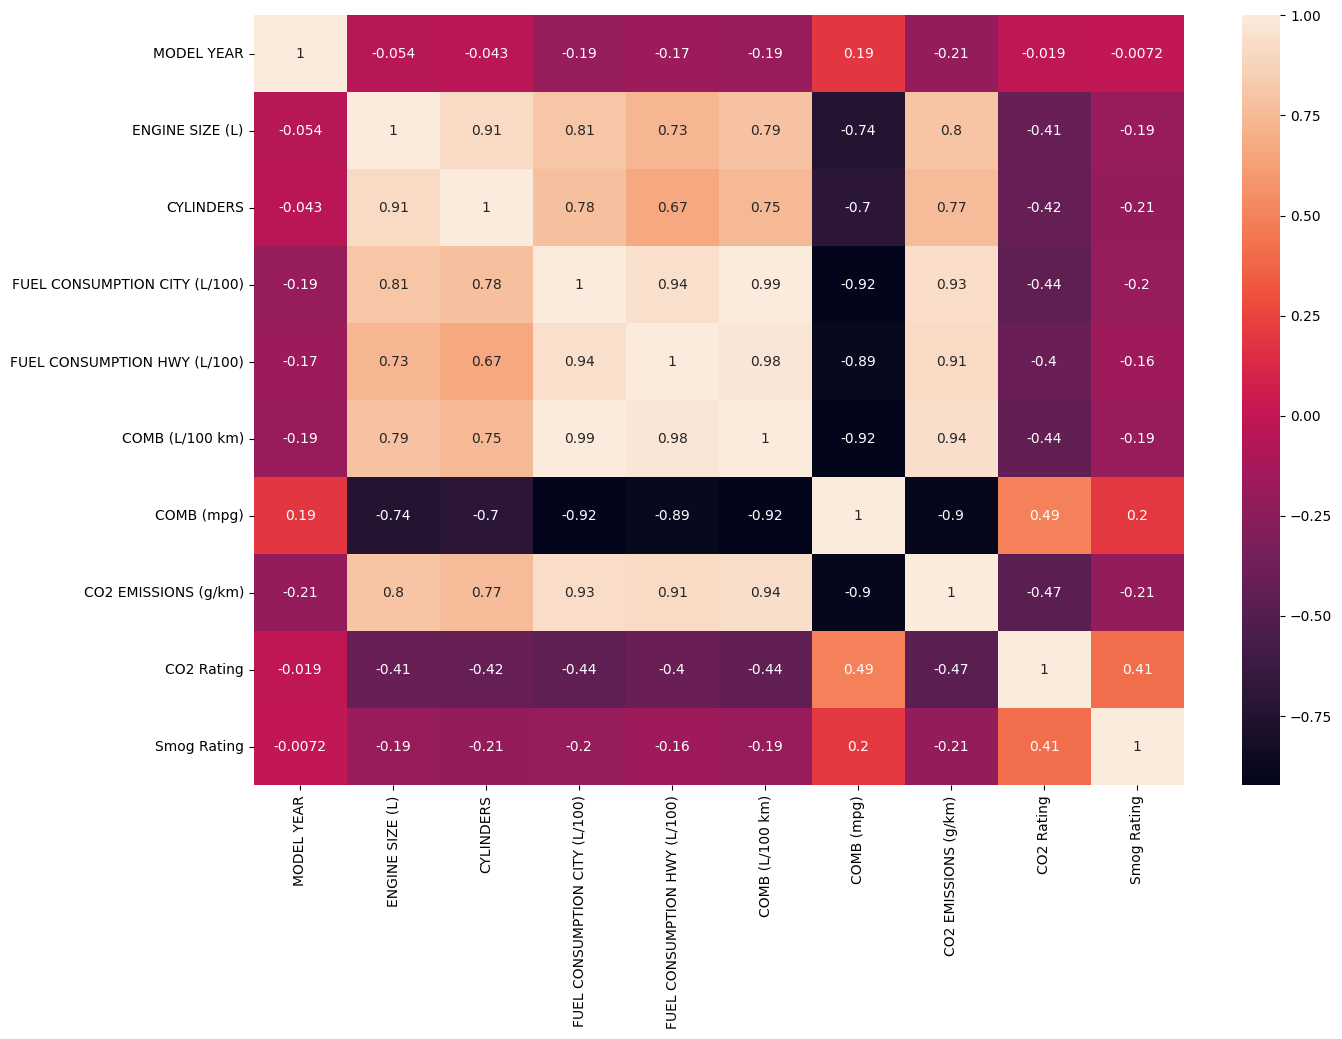

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True)

After plotting the heat map further correlations can be drawn between the various attributes and the response variables and dependency of one attribute on the other column as from the plotted heat map, we can see that the CO2 emissions by the attributes fuel consumption city, fuel consumption highway and combustion are almost entirely correlated with each other therefore moving forward we can apply dimension reduction by removing the interdependent attributes.

From the plotted heat map, it can be summarized that the concept of multicollinearity exists between Fuel consumption in city and fuel consumption in highway whereas a duplicate column of combustion exists in the data therefore the following columns can be reduced as a part of dimension reduction, Furthermore the column of smog rating can also be dropped as it has lean correlation value of just 0.41 and when initially cleaned the data smog rating constituted of almost 77% of the null values.


In [ ]:
Ccols = df.select_dtypes(exclude='number').columns
Ncols = df.select_dtypes(include='number').columns

In [ ]:
catcols = Ccols.to_list()
numcols = Ncols.to_list()

In [ ]:
catcols

['MAKE',
 'MODEL(# = high output engine)',
 'VEHICLE CLASS',
 'TRANSMISSION',
 'FUEL TYPE']

In [ ]:
numcols

['MODEL YEAR',
 'ENGINE SIZE (L)',
 'CYLINDERS',
 'FUEL CONSUMPTION CITY (L/100)',
 'FUEL CONSUMPTION HWY (L/100)',
 'COMB (L/100 km)',
 'COMB (mpg)',
 'CO2 EMISSIONS (g/km)',
 'CO2 Rating',
 'Smog Rating']

In [ ]:
import pandas as pd
import scipy.stats as stats

#

# Create a list of numerical columns
numerical_cols = ['CO2 EMISSIONS (g/km)', 'CO2 Rating']

# Create a list of categorical columns
categorical_cols = ['MAKE', 'MODEL(# = high output engine)', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL TYPE']

# Perform ANOVA test for each categorical column and each numerical column
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        groups = df.groupby(cat_col)[num_col].apply(list)
        f_value, p_value = stats.f_oneway(*groups)
        print(f"{cat_col} vs {num_col}: F-value = {f_value}, p-value = {p_value}")


MAKE vs CO2 EMISSIONS (g/km): F-value = 176.2453109331281, p-value = 0.0
MAKE vs CO2 Rating: F-value = 113.32184436464212, p-value = 0.0
MODEL(# = high output engine) vs CO2 EMISSIONS (g/km): F-value = 48.30099668746078, p-value = 0.0
MODEL(# = high output engine) vs CO2 Rating: F-value = 15.771485419659617, p-value = 0.0
VEHICLE CLASS vs CO2 EMISSIONS (g/km): F-value = 434.4734429059887, p-value = 0.0
VEHICLE CLASS vs CO2 Rating: F-value = 240.50381955640268, p-value = 0.0
TRANSMISSION vs CO2 EMISSIONS (g/km): F-value = 184.3451589668586, p-value = 0.0
TRANSMISSION vs CO2 Rating: F-value = 203.28684866219842, p-value = 0.0
FUEL TYPE vs CO2 EMISSIONS (g/km): F-value = 98.4713576622469, p-value = 2.5039464378136216e-83
FUEL TYPE vs CO2 Rating: F-value = 175.87564186283842, p-value = 6.267929278026124e-149


As for understanding the relation between the categorical variables and the numerical response variable we employed the ANOVA test on the model.
ANOVA: This measures the dependency of a target column with continuous values on another column containing categorical values.
On doing the hypothesis testing:
Ho: Categorical variables and CO2 emission rating are NOT correlated H1: Categorical variables and CO2 emission rating are correlated.

On doing the hypothesis testing we found out that the p value is less than α(alpha) and therefore we reject the null as by considering the principle “if p value is low null has to go “ Therefore, we cannot drop the categorical columns from the dataset.


In [ ]:
df['MODEL(# = high output engine)'].dtype

dtype('O')

In [ ]:
df['MODEL(# = high output engine)'] = df['MODEL(# = high output engine)'].astype(str)

In [ ]:
le = LabelEncoder()

In [ ]:
catcols

['MAKE',
 'MODEL(# = high output engine)',
 'VEHICLE CLASS',
 'TRANSMISSION',
 'FUEL TYPE']

In [ ]:
df[catcols] = df[catcols].apply(LabelEncoder().fit_transform)

In [ ]:
df.head()

MODEL YEAR  MAKE  MODEL(# = high output engine)  VEHICLE CLASS  \
1      1995.0     0                           2391             17   
2      1995.0     0                           2391             17   
3      1995.0     0                           2392             17   
4      1995.0     0                           2608              0   
5      1995.0     0                           2609              0   

   ENGINE SIZE (L)  CYLINDERS  TRANSMISSION  FUEL TYPE  \
1              1.8        4.0             2          3   
2              1.8        4.0            27          3   
3              1.8        4.0            27          4   
4              3.2        6.0             2          4   
5              3.2        6.0             2          4   

   FUEL CONSUMPTION CITY (L/100)  FUEL CONSUMPTION HWY (L/100)  \
1                           11.6                           8.3   
2                           11.0                           8.3   
3                           10.8                           8.3   
4                           14.2                          10.5   
5                           14.6                          11.0   

   COMB (L/100 km)  COMB (mpg)  CO2 EMISSIONS (g/km)  CO2 Rating  Smog Rating  
1             10.1        28.0                 232.0     4.65988     4.674311  
2              9.8        29.0                 225.0     4.65988     4.674311  
3              9.7        29.0                 223.0     4.65988     4.674311  
4             12.5        23.0                 288.0     4.65988     4.674311  
5             13.0        22.0                 299.0     4.65988     4.674311

For a machine learning algorithm, the data needs to be fed in numerical values for further prediction Therefore the categorical variables in the dataset needed to be converted to their numerical form, hence we applied label encoding to transform the categorical variables into their counterpart numerical variables in order to draw further calculational results

In [ ]:
df.drop(['MODEL YEAR', 'FUEL CONSUMPTION CITY (L/100)', 'FUEL CONSUMPTION HWY (L/100)', 'COMB (mpg)', 'Smog Rating'], axis=1, inplace=True)

Columns To Drop

Model Year - Low Correaltion Value of -0.205244

FUEL CONSUMPTION CITY (L/100) - multicollinearity

FUEL CONSUMPTION HWY (L/100) - multicollinearity

COMB (mpg) - duplicate column

Smog rating - as low correlation valie of 0.41, where 77% were initially null values.

In [ ]:
df

MAKE  MODEL(# = high output engine)  VEHICLE CLASS  ENGINE SIZE (L)  \
1         0                           2391             17              1.8   
2         0                           2391             17              1.8   
3         0                           2392             17              1.8   
4         0                           2608              0              3.2   
5         0                           2609              0              3.2   
...     ...                            ...            ...              ...   
26071    89                           4508             21              2.0   
26072    89                           4514             21              2.0   
26073    89                           4515             21              2.0   
26074    89                           4535             22              2.0   
26075    89                           4536             22              2.0   

       CYLINDERS  TRANSMISSION  FUEL TYPE  COMB (L/100 km)  \
1            4.0             2          3             10.1   
2            4.0            27          3              9.8   
3            4.0            27          4              9.7   
4            6.0             2          4             12.5   
5            6.0             2          4             13.0   
...          ...           ...        ...              ...   
26071        4.0            18          4              9.4   
26072        4.0            18          4              9.4   
26073        4.0            18          4              9.9   
26074        4.0            18          4             10.1   
26075        4.0            18          4             10.8   

       CO2 EMISSIONS (g/km)  CO2 Rating  
1                     232.0     4.65988  
2                     225.0     4.65988  
3                     223.0     4.65988  
4                     288.0     4.65988  
5                     299.0     4.65988  
...                     ...         ...  
26071                 219.0     5.00000  
26072                 219.0     5.00000  
26073                 232.0     5.00000  
26074                 236.0     5.00000  
26075                 252.0     5.00000  

[26075 rows x 10 columns]

#REGRESSION

In [ ]:
#Predicting Co2 Emission is a regression task
#Creating a new dataframe for the same
dfreg = df.copy()
dfreg.drop(['CO2 Rating'], axis=1, inplace=True) #Prediction Co2 rating is the classification task that we will be doing later on,
# also Co2 rating has as low correlation value of -0.47, where 72.5% were initially null values so we can drop it fro regression analysis.
dfreg.head()

MAKE  MODEL(# = high output engine)  VEHICLE CLASS  ENGINE SIZE (L)  \
1     0                           2391             17              1.8   
2     0                           2391             17              1.8   
3     0                           2392             17              1.8   
4     0                           2608              0              3.2   
5     0                           2609              0              3.2   

   CYLINDERS  TRANSMISSION  FUEL TYPE  COMB (L/100 km)  CO2 EMISSIONS (g/km)  
1        4.0             2          3             10.1                 232.0  
2        4.0            27          3              9.8                 225.0  
3        4.0            27          4              9.7                 223.0  
4        6.0             2          4             12.5                 288.0  
5        6.0             2          4             13.0                 299.0

In [ ]:
#Co2 Emissions is out target variable
y = dfreg['CO2 EMISSIONS (g/km)']
X = dfreg.drop(['CO2 EMISSIONS (g/km)'], axis = 1)

In [ ]:
print(X.shape)
print(y.shape)

(26075, 8)
(26075,)


In [ ]:
X.head()

MAKE  MODEL(# = high output engine)  VEHICLE CLASS  ENGINE SIZE (L)  \
1     0                           2391             17              1.8   
2     0                           2391             17              1.8   
3     0                           2392             17              1.8   
4     0                           2608              0              3.2   
5     0                           2609              0              3.2   

   CYLINDERS  TRANSMISSION  FUEL TYPE  COMB (L/100 km)  
1        4.0             2          3             10.1  
2        4.0            27          3              9.8  
3        4.0            27          4              9.7  
4        6.0             2          4             12.5  
5        6.0             2          4             13.0

In [ ]:
#Splitting the data into 80% Train and 20% Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#Scaling the data to scale data because it transforms the data to have zero mean and unit variance,
#which can improve the performance and accuracy of machine learning algorithms.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20860, 8)
(20860,)
(5215, 8)
(5215,)


#Multiple Linear Regression

In [ ]:
#Defining model for Linear Regression
from sklearn.linear_model import LinearRegression
regressor_mlr = LinearRegression()
regressor_mlr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor_mlr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# compute R-squared
r2 = r2_score(y_test, y_pred)

# compute root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# compute mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# compute mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared: {:.2f}".format(r2))
print("RMSE: {:.2f}".format(rmse))
print("MSE: {:.2f}".format(mse))
print("MAE: {:.2f}".format(mae))

R-squared: 0.91
RMSE: 19.17
MSE: 367.47
MAE: 11.76


#Decision Tree Regressor

In [ ]:
#Defining Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor
regressor_dtr = DecisionTreeRegressor(random_state = 0)
regressor_dtr.fit(X_train, y_train)
y_predDT = regressor_dtr.predict(X_test)

In [ ]:
# compute R-squared
r2 = r2_score(y_test, y_predDT)

# compute root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_predDT))

# compute mean squared error (MSE)
mse = mean_squared_error(y_test, y_predDT)

# compute mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_predDT)

print("R-squared: {:.2f}".format(r2))
print("RMSE: {:.2f}".format(rmse))
print("MSE: {:.2f}".format(mse))
print("MAE: {:.2f}".format(mae))

R-squared: 1.00
RMSE: 2.27
MSE: 5.16
MAE: 0.72


#Support Vector Regressor

In [ ]:
#Defining Support Vector Regressor Model
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf')
regressor_svr.fit(X_train, y_train)
y_predSVR = regressor_svr.predict(X_test)

In [ ]:
# compute R-squared
r2 = r2_score(y_test, y_predSVR)

# compute root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# compute mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# compute mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared: {:.2f}".format(r2))
print("RMSE: {:.2f}".format(rmse))
print("MSE: {:.2f}".format(mse))
print("MAE: {:.2f}".format(mae))

R-squared: 0.95
RMSE: 19.17
MSE: 367.47
MAE: 11.76


#Random Forest Regressor

In [ ]:
#Defining Random forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
regressor_rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_rfr.fit(X_train, y_train)
y_pred = regressor_rfr.predict(X_test)

In [ ]:
# compute R-squared
r2 = r2_score(y_test, y_pred)

# compute root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# compute mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# compute mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared: {:.2f}".format(r2))
print("RMSE: {:.2f}".format(rmse))
print("MSE: {:.2f}".format(mse))
print("MAE: {:.2f}".format(mae))

R-squared: 1.00
RMSE: 2.15
MSE: 4.63
MAE: 0.81


In [ ]:
#Fine tuning the hyperparameter using GridSearchCVfor better prediction and to avoid over fitting
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestRegressor object
rf = RandomForestRegressor(random_state=0)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and R2 score
print("Best parameters:", grid_search.best_params_)
print("R2 score:", grid_search.best_score_)

# Use the best model to predict on the test data
y_pred = grid_search.predict(X_test)

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
R2 score: 0.9990215973727498


#CLASSIFICATION

In [ ]:
#Our Classification task is to predict CO2 Rating
dfclf = df.copy()
dfclf.drop(['CO2 EMISSIONS (g/km)'], axis=1, inplace=True)
dfclf.head()

MAKE  MODEL(# = high output engine)  VEHICLE CLASS  ENGINE SIZE (L)  \
1     0                           2391             17              1.8   
2     0                           2391             17              1.8   
3     0                           2392             17              1.8   
4     0                           2608              0              3.2   
5     0                           2609              0              3.2   

   CYLINDERS  TRANSMISSION  FUEL TYPE  COMB (L/100 km)  CO2 Rating  
1        4.0             2          3             10.1     4.65988  
2        4.0            27          3              9.8     4.65988  
3        4.0            27          4              9.7     4.65988  
4        6.0             2          4             12.5     4.65988  
5        6.0             2          4             13.0     4.65988

In [ ]:
dfclf = dfclf[dfclf['CO2 Rating'].notna()] #CO2 Rating containg NULL values, for further prediction we take only the NON NUll data

In [ ]:
dfclf.shape

(26075, 9)

In [ ]:
dfclf

MAKE  MODEL(# = high output engine)  VEHICLE CLASS  ENGINE SIZE (L)  \
1         0                           2391             17              1.8   
2         0                           2391             17              1.8   
3         0                           2392             17              1.8   
4         0                           2608              0              3.2   
5         0                           2609              0              3.2   
...     ...                            ...            ...              ...   
26071    89                           4508             21              2.0   
26072    89                           4514             21              2.0   
26073    89                           4515             21              2.0   
26074    89                           4535             22              2.0   
26075    89                           4536             22              2.0   

       CYLINDERS  TRANSMISSION  FUEL TYPE  COMB (L/100 km)  CO2 Rating  
1            4.0             2          3             10.1     4.65988  
2            4.0            27          3              9.8     4.65988  
3            4.0            27          4              9.7     4.65988  
4            6.0             2          4             12.5     4.65988  
5            6.0             2          4             13.0     4.65988  
...          ...           ...        ...              ...         ...  
26071        4.0            18          4              9.4     5.00000  
26072        4.0            18          4              9.4     5.00000  
26073        4.0            18          4              9.9     5.00000  
26074        4.0            18          4             10.1     5.00000  
26075        4.0            18          4             10.8     5.00000  

[26075 rows x 9 columns]

In [ ]:
#CO2 Rating is out target variable
y = dfclf['CO2 Rating']
X = dfclf.drop(['CO2 Rating'], axis = 1)

In [ ]:
y = y.astype(int)

In [ ]:
y -= 1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score

#Support Vector Classifier

In [ ]:
#Defining Support Vector Classifier Model
from sklearn.svm import SVC
classifier_svm_linear = SVC(kernel = 'linear', random_state = 0, probability=True)
classifier_svm_linear.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_svm_linear, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 78.73 %
Standard Deviation: 0.02 %


In [ ]:
prediction = classifier_svm_linear.predict(X_test)

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('\n SVM clasification report:\n \n', classification_report(y_test,prediction))
print('\n SVM confussion matrix:\n',confusion_matrix(y_test, prediction))

Accuracy: 78.73 %

 SVM clasification report:
 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.00      0.00      0.00        79
           2       0.00      0.00      0.00       258
           3       0.79      1.00      0.88      4113
           4       0.00      0.00      0.00       354
           5       0.00      0.00      0.00       187
           6       0.00      0.00      0.00       118
           7       0.00      0.00      0.00        41
           8       0.00      0.00      0.00        17
           9       0.00      0.00      0.00        13

    accuracy                           0.79      5215
   macro avg       0.08      0.10      0.09      5215
weighted avg       0.62      0.79      0.70      5215


 SVM confussion matrix:
 [[   0    0    0   35    0    0    0    0    0    0]
 [   0    0    0   79    0    0    0    0    0    0]
 [   0    0    0  258    0    0    0    0    0    0]
 [   0 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


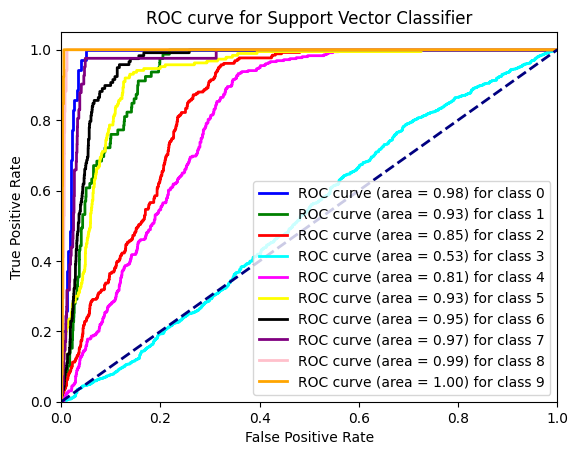

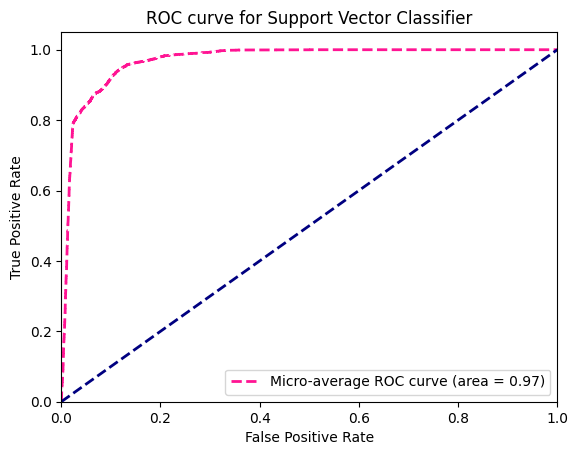

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
# Make predictions on the test set and obtain the predicted probabilities
y_pred_proba = classifier_svm_linear.predict_proba(X_test)

# Compute the ROC curve and ROC area for each class using the OvA strategy
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    y_true = (y_test == i)
    fpr[i], tpr[i], _ = roc_curve(y_true, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
y_true = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_true.shape[1]
# Plot ROC curve for each class
plt.figure()
lw = 2
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'pink', 'orange']
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Support Vector Classifier')
plt.legend(loc="lower right")
plt.show()

#Plotting Micro Average Curve for the 10 class roc curve
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw, linestyle='--', label='Micro-average ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Support Vector Classifier')
plt.legend(loc="lower right")
plt.show()


#Multinomial Naive Bayes

In [ ]:
#Defining Multinomial Naive Bayes Classifier Model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
classifier_multinomial_bayes = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
classifier_multinomial_bayes.fit(X_train, y_train)

Pipeline(steps=[('Normalizing', MinMaxScaler()),
                ('MultinomialNB', MultinomialNB())])

In [ ]:
prediction = classifier_multinomial_bayes.predict(X_test)

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('\n NAIVE BAYES clasification report:\n \n', classification_report(y_test,prediction))
print('\n NAICE BAYES confussion matrix:\n',confusion_matrix(y_test, prediction))

Accuracy: 78.73 %

 NAIVE BAYES clasification report:
 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.00      0.00      0.00        79
           2       0.00      0.00      0.00       258
           3       0.79      1.00      0.88      4113
           4       0.00      0.00      0.00       354
           5       0.00      0.00      0.00       187
           6       0.00      0.00      0.00       118
           7       0.00      0.00      0.00        41
           8       0.00      0.00      0.00        17
           9       0.00      0.00      0.00        13

    accuracy                           0.79      5215
   macro avg       0.08      0.10      0.09      5215
weighted avg       0.62      0.79      0.70      5215


 NAICE BAYES confussion matrix:
 [[   0    0    0   35    0    0    0    0    0    0]
 [   0    0    0   79    0    0    0    0    0    0]
 [   0    0    0  258    0    0    0    0   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


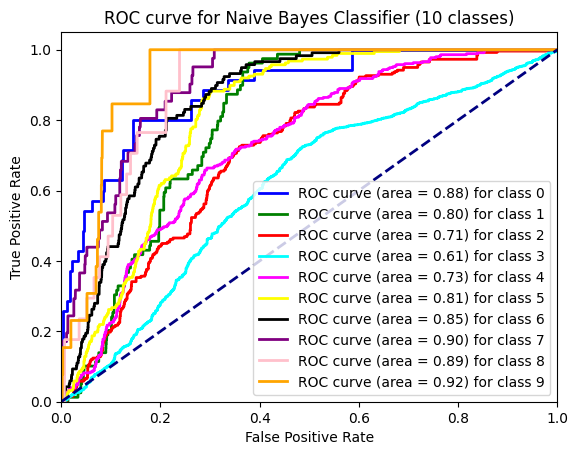

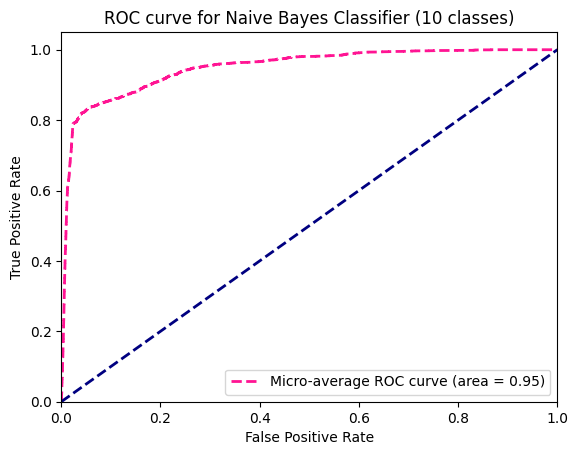

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
# Make predictions on the test set and obtain the predicted probabilities
y_pred_proba = classifier_multinomial_bayes.predict_proba(X_test)

# Compute the ROC curve and ROC area for each class using the OvA strategy
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    y_true = (y_test == i)
    fpr[i], tpr[i], _ = roc_curve(y_true, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
y_true = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_true.shape[1]
# Plot ROC curve for each class
plt.figure()
lw = 2
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'pink', 'orange']
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Naive Bayes Classifier (10 classes)')
plt.legend(loc="lower right")
plt.show()

#Plotting Micro Average Curve for the 10 class roc curve
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw, linestyle='--', label='Micro-average ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Naive Bayes Classifier (10 classes)')
plt.legend(loc="lower right")
plt.show()


#Random Forest Classifier

In [ ]:
#Defining Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
classifier_rfr = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rfr.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_rfr, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 91.25 %
Standard Deviation: 0.58 %


In [ ]:
prediction = classifier_rfr.predict(X_test)

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('\n RANDOM FOREST clasification report:\n \n', classification_report(y_test,prediction))
print('\n RANDOM FOREST confussion matrix:\n',confusion_matrix(y_test, prediction))

Accuracy: 91.25 %

 RANDOM FOREST clasification report:
 
               precision    recall  f1-score   support

           0       0.87      0.74      0.80        35
           1       0.70      0.78      0.74        79
           2       0.80      0.79      0.80       258
           3       0.95      0.96      0.95      4113
           4       0.80      0.76      0.78       354
           5       0.85      0.71      0.77       187
           6       0.66      0.64      0.65       118
           7       0.51      0.44      0.47        41
           8       0.62      0.88      0.73        17
           9       0.78      0.54      0.64        13

    accuracy                           0.91      5215
   macro avg       0.75      0.73      0.73      5215
weighted avg       0.91      0.91      0.91      5215


 RANDOM FOREST confussion matrix:
 [[  26    5    0    4    0    0    0    0    0    0]
 [   3   62    8    6    0    0    0    0    0    0]
 [   0   15  205   38    0    0    0    

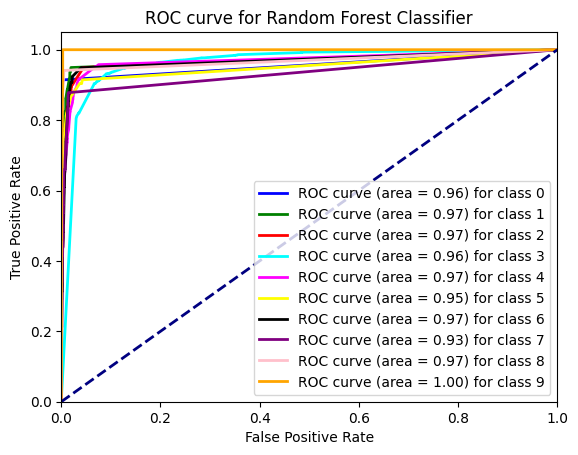

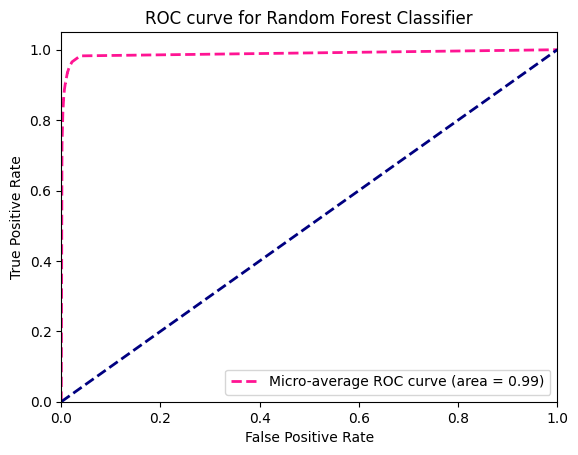

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
# Make predictions on the test set and obtain the predicted probabilities
y_pred_proba = classifier_rfr.predict_proba(X_test)

# Compute the ROC curve and ROC area for each class using the OvA strategy
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    y_true = (y_test == i)
    fpr[i], tpr[i], _ = roc_curve(y_true, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


y_true = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_true.shape[1]
# Plot ROC curve for each class
plt.figure()
lw = 2
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'pink', 'orange']
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot ROC curve formicro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw, linestyle='--', label='Micro-average ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()


#XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#Defining XGBoost Classifier Model
xgb_model = XGBClassifier(objective='multi:softmax')

In [ ]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softmax', predictor=None, ...)

In [ ]:
accuracies = cross_val_score(estimator = xgb_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 92.21 %
Standard Deviation: 0.49 %


In [ ]:
prediction = xgb_model.predict(X_test)

In [ ]:
print('XGBoost Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('\n XGBoost clasification report:\n \n', classification_report(y_test,prediction))
print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))

XGBoost Accuracy: 92.21 %

 XGBoost clasification report:
 
               precision    recall  f1-score   support

           0       0.85      0.66      0.74        35
           1       0.68      0.77      0.72        79
           2       0.83      0.81      0.82       258
           3       0.95      0.97      0.96      4113
           4       0.84      0.75      0.80       354
           5       0.85      0.73      0.79       187
           6       0.71      0.71      0.71       118
           7       0.58      0.54      0.56        41
           8       0.63      0.71      0.67        17
           9       0.64      0.69      0.67        13

    accuracy                           0.92      5215
   macro avg       0.76      0.73      0.74      5215
weighted avg       0.92      0.92      0.92      5215


 confussion matrix:
 [[  23    5    0    7    0    0    0    0    0    0]
 [   3   61    9    6    0    0    0    0    0    0]
 [   0   16  209   33    0    0    0    0    0    0]

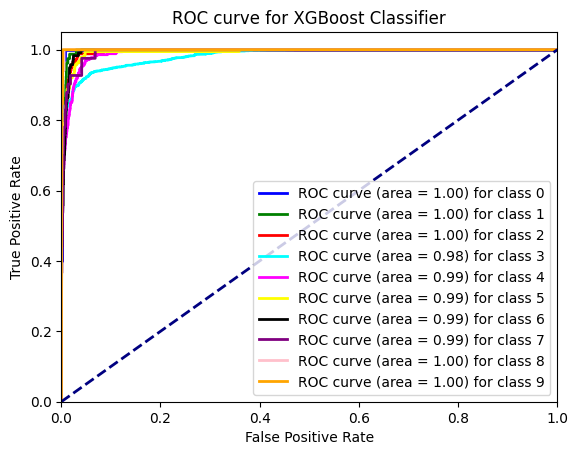

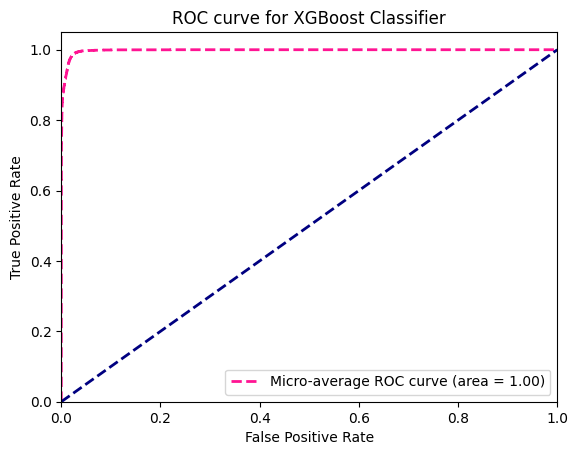

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
# Make predictions on the test set and obtain the predicted probabilities
y_pred_proba = xgb_model.predict_proba(X_test)

# Compute the ROC curve and ROC area for each class using the OvA strategy
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    y_true = (y_test == i)
    fpr[i], tpr[i], _ = roc_curve(y_true, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
y_true = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_true.shape[1]
# Plot ROC curve for each class and micro-average ROC curve
plt.figure()
lw = 2
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'pink', 'orange']
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', lw=lw, linestyle='--', label='Micro-average ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()
